# Linear Regression With Python

## Import Some Basic Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

## generate data for regression training

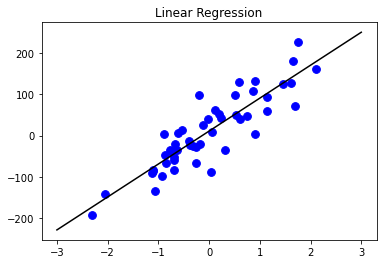

In [2]:
x, y = make_regression(n_samples=50, n_features=1, n_informative=1, noise=50, random_state=1)
reg=LinearRegression()
reg.fit(x,y)
z = np.linspace(-3,3,200).reshape(-1,1)
plt.scatter(x,y,c='b',s=60)
plt.plot(z, reg.predict(z),c='k')
plt.title('Linear Regression')
plt.show()

Use `intercept_` and `coef_` method to get the values of intercept and coefficents.

In [3]:
reg.intercept_, reg.coef_

(10.922212258169349, array([79.52463976]))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x, y = make_regression(n_samples=100, n_features=2, n_informative=2, random_state=38)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
lr = LinearRegression().fit(x_train, y_train)
lr.coef_, lr.intercept_

(array([70.38592453,  7.43213621]), -2.1316282072803006e-14)

In [6]:
lr.score(x_test, y_test), lr.score(x_train, y_train)

(1.0, 1.0)

In [7]:
from sklearn.datasets import load_diabetes

In [8]:
x, y = load_diabetes().data, load_diabetes().target
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
lr = LinearRegression().fit(x_train, y_train)
lr.coef_, lr.intercept_,lr.score(x_test, y_test), lr.score(x_train, y_train)

(array([   11.5106203 ,  -282.51347161,   534.20455671,   401.73142674,
        -1043.89718398,   634.92464089,   186.43262636,   204.93373199,
          762.47149733,    91.9460394 ]),
 152.5624877455247,
 0.45934404966916387,
 0.530381475970933)

## Ridge Regression

In [9]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(x_train, y_train)
ridge.score(x_train, y_train), ridge.score(x_test, y_test)

(0.4326376676137663, 0.4325217769068186)

the relationship between parameter $\alpha$ and `coef_`

<function matplotlib.pyplot.legend(*args, **kwargs)>

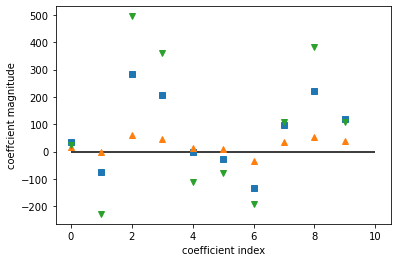

In [11]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
ridge10 = Ridge(alpha=10).fit(x_train,y_train)
plt.plot(ridge.coef_,'s',label='Ridge alpha=1')
plt.plot(ridge10.coef_,'^',label='Ridge alpha=10')
plt.plot(ridge01.coef_,'v',label='Ridge alpha=0.1')
plt.xlabel("coefficient index")
plt.ylabel("coeffcient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.legend

## generate the learning_curve and kfold testing

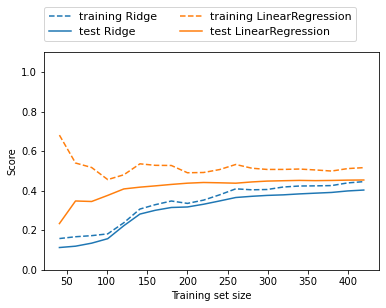

In [13]:
from sklearn.model_selection import learning_curve, KFold
def plot_learning_curve(est, x, y):
    training_set_size, train_scores, test_scores=learning_curve(est,x,y,train_sizes=np.linspace(0.1,1,20),cv=KFold(20,shuffle=True,random_state=1))
    estimator_name=est.__class__.__name__
    line = plt.plot(training_set_size,train_scores.mean(axis=1),'--',label="training "+estimator_name)
    plt.plot(training_set_size,test_scores.mean(axis=1),'-',label="test "+estimator_name, c=line[0].get_color())
    plt.xlabel('Training set size')
    plt.ylabel('Score')
    plt.ylim(0, 1.1)

plot_learning_curve(Ridge(alpha=1), x, y)
plot_learning_curve(LinearRegression(), x, y)
plt.legend(loc=(0,1.05), ncol=2, fontsize=11)

## Lasso Regression

In [14]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(x_train,y_train)
lasso.score(x_train, y_train), lasso.score(x_test, y_test), np.sum(lasso.coef_ != 0)

(0.36242428249291325, 0.3656185896212798, 3)

In [17]:
lasso1 = Lasso(alpha=0.1, max_iter=100000).fit(x_train, y_train)
lasso1.score(x_train, y_train), lasso1.score(x_test, y_test), np.sum(lasso1.coef_ != 0)

(0.519480608218357, 0.47994757514558173, 7)